In [1]:
import joblib

from sensingpy import reader, plot
from physics_informed_ml_odw import predict_2d

In [2]:
image = reader.open(r'../data/formosa_2018.tif') 

ml_model = joblib.load('../models/ML__MLP.pkl')
cs_ml_model = joblib.load('../models/CS_ML__MLP.pkl')

image['ODW_ML'] = predict_2d(image, ml_model)
image['ODW_CS_ML'] = predict_2d(image, cs_ml_model)

Text(0.5, 1.0, 'ODW CS + ML')

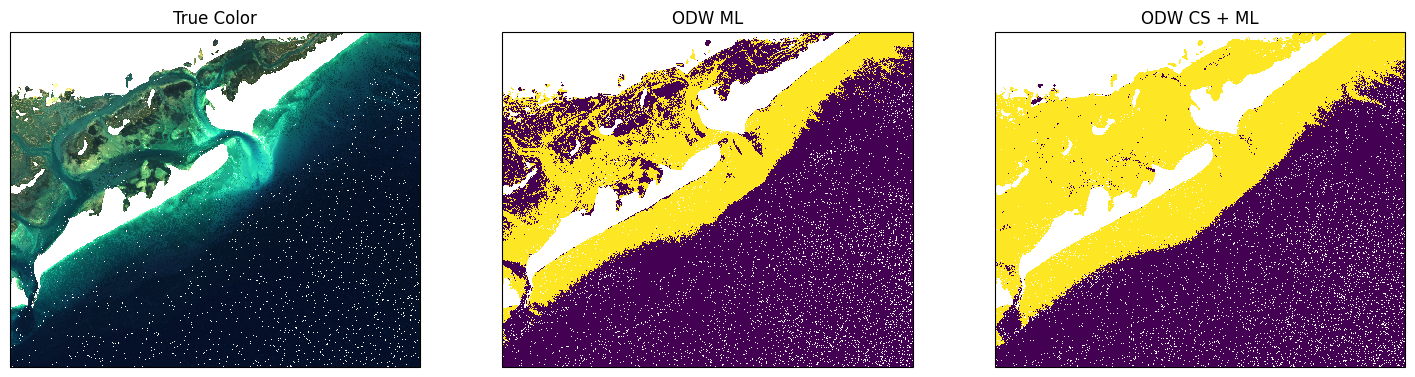

In [3]:
fig, axs = plot.get_geofigure(image.crs, 1, 3, figsize = (6 * 3, 6))

plot.plot_rgb(image, 'Rrs_B4', 'Rrs_B3', 'Rrs_B2', axs[0], brightness = 30)
plot.plot_band(image, 'ODW_ML', axs[1])
plot.plot_band(image, 'ODW_CS_ML', axs[2])

axs[0].set_title('True Color')
axs[1].set_title('ODW ML')
axs[2].set_title('ODW CS + ML')